# ClimateQ&A
---
Goal of the notebook: Recommended graphs functionality

Inputs of the notebook:

Output of the notebook:


Takeaways:

Questions, thoughts and remarks:

## Dependencies and path
Adjust the argument in `sys.path.append` to align with your specific requirements.

In [1]:
import pandas as pd 
import numpy as np
import os
from IPython.display import display, Markdown

%load_ext autoreload
%autoreload 2

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import sys

sys.path.append(
    "C:/Users/dorab/OneDrive - Ecole Polytechnique/Documents/Data Science for Business HEC x Polytechnique/Year 2/Tooling for the Data Scientist/tfds_project"
)

## 1. Import objects
### 1.1 LLM

In [3]:
from tfds_project.engine.llm import get_llm

llm = get_llm()

In [4]:
llm.invoke("Hello world!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-3.5-turbo-0125'}, id='run-9b72e57d-cb5b-4742-8556-c5562b3b6c4a-0')

### 1.2 Embedding

In [5]:
from langchain.embeddings import OpenAIEmbeddings

embeddings_function = OpenAIEmbeddings(
    model="text-embedding-ada-002",
)

C:\Users\dorab\AppData\Local\Temp\ipykernel_12988\2023931718.py:3: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings_function = OpenAIEmbeddings(


In [3]:
# from tfds_project.engine.embeddings import get_embeddings_function

# embeddings_function = get_embeddings_function()

c:\Users\dorab\AppData\Local\pypoetry\Cache\virtualenvs\tfds-project-PW221oof-py3.10\lib\site-packages\pydantic\_internal\_fields.py:132: UserWarning: Field "model_name" in HuggingFaceInferenceAPIEmbeddings has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


Loading embeddings model:  BAAI/bge-base-en-v1.5


c:\Users\dorab\AppData\Local\pypoetry\Cache\virtualenvs\tfds-project-PW221oof-py3.10\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


### 1.3 Reranker

In [6]:
from tfds_project.engine.reranker import get_reranker

reranker = get_reranker("nano")
reranker

c:\Users\dorab\AppData\Local\pypoetry\Cache\virtualenvs\tfds-project-PW221oof-py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:flashrank.Ranker:Downloading ms-marco-TinyBERT-L-2-v2...


Loading FlashRankRanker model ms-marco-TinyBERT-L-2-v2
Loading model FlashRank model ms-marco-TinyBERT-L-2-v2...


ms-marco-TinyBERT-L-2-v2.zip: 100%|██████████| 3.26M/3.26M [00:00<00:00, 39.3MiB/s]


## 2 Vectorstore

### 2.2 OWID data

In [40]:
import os
import pandas as pd
from langchain.vectorstores import FAISS
from langchain.document_loaders import DataFrameLoader

# Step 1: Load CSV file into a DataFrame
df = pd.read_csv(
    "C:/Users/dorab/OneDrive - Ecole Polytechnique/Documents/Data Science for Business HEC x Polytechnique/Year 2/Tooling for the Data Scientist/tfds_project/data/charts_owid.csv"
)

df.drop(columns=["url", "subtitle"], inplace=True)

df["doc_id"] = "owid_" + df.index.astype(str)

# Step 4: Prepare the DataFrameLoader
# Map the 'embedding' column as the document text and 'category' and 'url' as metadata
loader = DataFrameLoader(df, page_content_column="title")

# Step 5: Load the documents
documents = loader.load()

# Step 6: Generate embeddings and create a FAISS vector store with metadata
vector_store = FAISS.from_documents(documents, embeddings_function)

# Step 7: Save vector store to disk (optional)
vector_store.save_local("faiss_index")

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


### 2.4 Vectorstore

In [41]:
vectorstore_graphs = FAISS.load_local(
    "faiss_index", embeddings_function, allow_dangerous_deserialization=True
)

In [42]:
vectorstore_graphs.similarity_search_with_relevance_scores(
    "What is the trend of clean water?"
)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


[(Document(metadata={'category': 'Clean Water', 'embedding': '<iframe src="https://ourworldindata.org/grapher/number-of-people-in-the-world-with-and-without-access-to-improved-water-sources?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>', 'doc_id': 'owid_676'}, page_content='Usage of improved water sources'),
  0.7987920199536289),
 (Document(metadata={'category': 'Clean Water & Sanitation', 'embedding': '<iframe src="https://ourworldindata.org/grapher/number-of-people-in-the-world-with-and-without-access-to-improved-water-sources?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>', 'doc_id': 'owid_748'}, page_content='Usage of improved water sources'),
  0.7987919778067805),
 (Document(metadata={'category': 'Water Use & Stress', 'embedding': '<iframe src="https://ourworldindata.org/grapher/drinking-water-services-coverage-urban?tab=map" lo

## 3. Retriever for recommended graphs

### 3.1 Custom retriever

In [10]:
from tfds_project.engine.graph_retriever import GraphRetriever

retriever = GraphRetriever(vectorstore=vectorstore_graphs)

In [27]:
retriever.invoke("hydrogen import evolutions")

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


[Document(metadata={'category': 'Energy', 'embedding': '<iframe src="https://ourworldindata.org/grapher/net-electricity-imports?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>', 'similarity_score': 0.343144, 'content': 'Net electricity imports'}, page_content='Net electricity imports'),
 Document(metadata={'category': 'Energy', 'embedding': '<iframe src="https://ourworldindata.org/grapher/energy-imports-and-exports-energy-use?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>', 'similarity_score': 0.34886774, 'content': 'Energy imports and exports'}, page_content='Energy imports and exports'),
 Document(metadata={'category': 'CO2 & Greenhouse Gas Emissions', 'embedding': '<iframe src="https://ourworldindata.org/grapher/import-of-environmentally-sound-technologies?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" a

## 5. Graph

### 5.1 Make graph agent

In [12]:
import sys
import os
from contextlib import contextmanager

from langchain.schema import Document
from langgraph.graph import END, StateGraph

from typing_extensions import TypedDict
from typing import List, Dict

from IPython.display import Image, display, HTML
from langchain_core.runnables.graph import MermaidDrawMethod

# from tfds_project.engine.chains.answer_chitchat import make_chitchat_node
# from tfds_project.engine.chains.answer_ai_impact import make_ai_impact_node
from tfds_project.engine.chains.query_transformation import make_query_transform_node
from tfds_project.engine.chains.translation import make_translation_node

from tfds_project.engine.chains.intent_categorization import (
    make_intent_categorization_node,
)

# from tfds_project.engine.chains.retriever import make_retriever_node
# from tfds_project.engine.chains.answer_rag import make_rag_node
# from tfds_project.engine.chains.answer_rag_graph import make_rag_graph_node
from tfds_project.engine.chains.set_defaults import set_defaults
from tfds_project.engine.chains.graph_retriever_node import make_graph_retriever_node

# from tfds_project.engine.chains.chitchat_categorization import (
# make_chitchat_intent_categorization_node,
# )


class GraphState(TypedDict):
    """
    Represents the state of our graph.
    """

    user_input: str
    language: str
    intent: str
    # search_graphs_chitchat: bool
    query: str
    questions: List[dict]
    answer: str
    audience: str
    sources_input: List[str]
    documents: List[Document]
    recommended_content: List[Document]
    # graphs_returned: Dict[str,str]


# def search(state):
#     return {}


# def route_intent(state):
#     intent = state["intent"]
#     if intent in ["chitchat", "esg"]:
#         return "answer_chitchat"
#     elif intent == "ai":
#         return "answer_ai_impact"
#     else:
#         # Search route
#         return "search"


# def chitchat_route_intent(state):
#     intent = state["search_graphs_chitchat"]
#     if intent is True:
#         return "retrieve_graphs_chitchat"
#     elif intent is False:
#         return END


def route_translation(state):
    if state["language"].lower() == "english":
        return "transform_query"
    else:
        return "translate_query"


# def route_based_on_relevant_docs(state, threshold_docs=0.2):
#     docs = [
#         x for x in state["documents"] if x.metadata["reranking_score"] > threshold_docs
#     ]
#     if len(docs) > 0:
#         return "answer_rag"
#     else:
#         return "answer_rag_no_docs"


def make_id_dict(values):
    return {k: k for k in values}


def make_graph_agent(llm, vectorstore_graphs, reranker, threshold_docs=0.2):

    workflow = StateGraph(GraphState)

    # Define the node functions
    categorize_intent = make_intent_categorization_node(llm)
    transform_query = make_query_transform_node(llm)
    translate_query = make_translation_node(llm)
    # answer_chitchat = make_chitchat_node(llm)
    # answer_ai_impact = make_ai_impact_node(llm)
    # retrieve_documents = make_retriever_node(vectorstore_ipcc, reranker)
    retrieve_graphs = make_graph_retriever_node(vectorstore_graphs, reranker)
    # answer_rag_graph = make_rag_graph_node(llm)
    # answer_rag = make_rag_node(llm, with_docs=True)
    # answer_rag_no_docs = make_rag_node(llm, with_docs=False)
    # chitchat_categorize_intent = make_chitchat_intent_categorization_node(llm)

    # Define the nodes
    workflow.add_node("set_defaults", set_defaults)
    workflow.add_node("categorize_intent", categorize_intent)
    # workflow.add_node("search", search)
    workflow.add_node("transform_query", transform_query)
    workflow.add_node("translate_query", translate_query)
    # workflow.add_node("transform_query_ai", transform_query)
    # workflow.add_node("translate_query_ai", translate_query)
    # workflow.add_node("answer_chitchat", answer_chitchat)
    # workflow.add_node("chitchat_categorize_intent", chitchat_categorize_intent)
    # workflow.add_node("answer_ai_impact", answer_ai_impact)
    workflow.add_node("retrieve_graphs", retrieve_graphs)
    # workflow.add_node("retrieve_graphs_chitchat", retrieve_graphs)
    # workflow.add_node("retrieve_graphs_ai", retrieve_graphs)
    # workflow.add_node("answer_rag_graph", answer_rag_graph)
    # workflow.add_node("answer_rag_graph_ai", answer_rag_graph)
    # workflow.add_node("retrieve_documents", retrieve_documents)
    # workflow.add_node("answer_rag", answer_rag)
    # workflow.add_node("answer_rag_no_docs", answer_rag_no_docs)

    # Entry point
    workflow.set_entry_point("set_defaults")

    # # CONDITIONAL EDGES
    # workflow.add_conditional_edges(
    #     "categorize_intent",
    #     route_intent,
    #     make_id_dict(["answer_chitchat", "answer_ai_impact", "search"]),
    # )

    # workflow.add_conditional_edges(
    #     "chitchat_categorize_intent",
    #     chitchat_route_intent,
    #     make_id_dict(["retrieve_graphs_chitchat", END]),
    # )

    workflow.add_conditional_edges(
        "categorize_intent",
        route_translation,
        make_id_dict(["translate_query", "transform_query"]),
    )

    # workflow.add_conditional_edges(
    #     "retrieve_documents",
    #     lambda x: route_based_on_relevant_docs(x, threshold_docs=threshold_docs),
    #     make_id_dict(["answer_rag", "answer_rag_no_docs"]),
    # )

    # Define the edges
    workflow.add_edge("set_defaults", "categorize_intent")
    workflow.add_edge("translate_query", "transform_query")
    workflow.add_edge("transform_query", "retrieve_graphs")
    # workflow.add_edge("retrieve_graphs", "answer_rag_graph")
    workflow.add_edge("retrieve_graphs", END)
    # workflow.add_edge("answer_rag_graph", "retrieve_documents")
    # workflow.add_edge("answer_rag", END)
    # workflow.add_edge("answer_rag_no_docs", END)
    # workflow.add_edge("answer_chitchat", "chitchat_categorize_intent")
    # workflow.add_edge("answer_chitchat", END)
    # workflow.add_edge("answer_ai_impact", END)
    # workflow.add_edge("retrieve_graphs_chitchat", END)
    # workflow.add_edge("answer_ai_impact", "translate_query_ai")
    # workflow.add_edge("translate_query_ai", "transform_query_ai")
    # workflow.add_edge("transform_query_ai", "retrieve_graphs_ai")
    # workflow.add_edge("retrieve_graphs_ai", "answer_rag_graph_ai")
    # workflow.add_edge("answer_rag_graph_ai", END)
    # workflow.add_edge("retrieve_graphs_ai", END)

    # Compile
    app = workflow.compile()
    return app


def display_graph(app):
    display(
        Image(
            app.get_graph().draw_mermaid_png(
                draw_method=MermaidDrawMethod.API,
            )
        )
    )

C:\Users\dorab\AppData\Local\Temp\ipykernel_12988\1581121292.py:16: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  from tfds_project.engine.chains.query_transformation import make_query_transform_node


In [13]:
app = make_graph_agent(
    llm=llm,
    vectorstore_graphs=vectorstore_graphs,
    reranker=reranker,
)

### 5.2 Testing graph agent

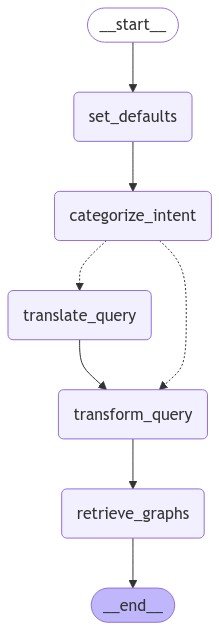

In [46]:
from tfds_project.engine.graph import make_graph_agent

app = make_graph_agent(
    llm=llm,
    vectorstore_graphs=vectorstore_graphs,
    reranker=reranker,
)
display_graph(app)

In [47]:
output = await app.ainvoke(
    {
        "user_input": "should i be a vegetarian",
        "audience": "general",
        "sources_input": "auto",
    }
)

output

---- Setting defaults ----


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"




Output intent categorization: {'intent': 'search'}



INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


---- Retrieving graphs ----
Subquestion 0: What are the environmental impacts of being a vegetarian?


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


5 graphs retrieved for subquestion 1: [Document(metadata={'category': 'Diet Compositions', 'embedding': '<iframe src="https://ourworldindata.org/grapher/animal-protein-consumption?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>', 'doc_id': 'owid_844', 'similarity_score': 0.31865084, 'content': 'Animal protein consumption', 'reranking_score': 0.027087220922112465, 'query_used_for_retrieval': 'What are the environmental impacts of being a vegetarian?', 'sources_used': ['OWID']}, page_content='Animal protein consumption'), Document(metadata={'category': 'Environmental Impacts of Food Production', 'embedding': '<iframe src="https://ourworldindata.org/grapher/environmental-footprint-milks?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>', 'doc_id': 'owid_1158', 'similarity_score': 0.32873148, 'content': 'Environmental footprints of dairy and pl

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


5 graphs retrieved for subquestion 2: [Document(metadata={'category': 'Diet Compositions', 'embedding': '<iframe src="https://ourworldindata.org/grapher/animal-protein-consumption?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>', 'doc_id': 'owid_844', 'similarity_score': 0.33236572, 'content': 'Animal protein consumption', 'reranking_score': 0.0008151488727889955, 'query_used_for_retrieval': 'What are the health benefits of being a vegetarian?', 'sources_used': ['OWID']}, page_content='Animal protein consumption'), Document(metadata={'category': 'Diet Compositions', 'embedding': '<iframe src="https://ourworldindata.org/grapher/eat-lancet-diet-animal-products?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>', 'doc_id': 'owid_849', 'similarity_score': 0.36820665, 'content': 'Consumption of animal products in the EAT-Lancet diet', 'reranking_

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


5 graphs retrieved for subquestion 3: [Document(metadata={'category': 'Diet Compositions', 'embedding': '<iframe src="https://ourworldindata.org/grapher/animal-protein-consumption?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>', 'doc_id': 'owid_844', 'similarity_score': 0.33564198, 'content': 'Animal protein consumption', 'reranking_score': 0.0030231489799916744, 'query_used_for_retrieval': 'What are the ethical reasons for choosing a vegetarian diet?', 'sources_used': ['OWID']}, page_content='Animal protein consumption'), Document(metadata={'category': 'Animal Welfare', 'embedding': '<iframe src="https://ourworldindata.org/grapher/survey-dietary-choices-sentience?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>', 'doc_id': 'owid_168', 'similarity_score': 0.34962362, 'content': 'Public attitudes to dietary choices and meat-eating in the U

{'user_input': 'should i be a vegetarian',
 'language': 'English',
 'intent': 'search',
 'query': 'should i be a vegetarian',
 'questions': [{'question': 'What are the environmental impacts of being a vegetarian?',
   'sources': ['IPCC', 'IPBES', 'IPOS']},
  {'question': 'What are the health benefits of being a vegetarian?',
   'sources': ['IPCC', 'IPBES', 'IPOS']},
  {'question': 'What are the ethical reasons for choosing a vegetarian diet?',
   'sources': ['IPCC', 'IPBES', 'IPOS']}],
 'audience': 'general',
 'sources_input': 'auto',
 'recommended_content': [Document(metadata={'category': 'Diet Compositions', 'embedding': '<iframe src="https://ourworldindata.org/grapher/animal-protein-consumption?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>', 'doc_id': 'owid_844', 'similarity_score': 0.33564198, 'content': 'Animal protein consumption', 'reranking_score': 0.0030231489799916744, 'query_used_for_retrieval': 'Wh

In [48]:
len(output["recommended_content"])

11

In [100]:
docs_used = True

async for event in app.astream_events(
    {"user_input": "salade de fruits", "audience": "general", "sources_input": "auto"},
    version="v1",
):
    if (
        docs_used is True
        and "metadata" in event
        and "langgraph_node" in event["metadata"]
    ):
        if event["metadata"]["langgraph_node"] in [
            "answer_rag_no_docs",
            "answer_chitchat",
            "answer_ai_impact",
        ]:
            docs_used = False
            print(f"\nDOCS USED: {docs_used}\n")
    # if event["name"] == "retrieve_documents" and event["event"] == "on_chain_end":
    # print(event)
    # print(event)

---- Setting defaults ----


Output intent categorization: {'intent': 'chitchat'}

---- Retrieving graphs ----
Subquestion 0: What are the ingredients in a fruit salad?
8 graphs retrieved for subquestion 1: [Document(metadata={'category': 'Diet Compositions', 'doc_id': 'owid_854', 'returned_content': '<iframe src="https://ourworldindata.org/grapher/fruit-consumption-by-fruit-type?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>', 'source': 'OWID', 'subtitle': 'Average fruit consumption per person, differentiated by fruit types, measured in kilograms per year.', 'url': 'https://ourworldindata.org/grapher/fruit-consumption-by-fruit-type', 'similarity_score': 0.84071946144104, 'content': 'Fruit consumption by type', 'reranking_score': 0.84071946144104, 'sources_used': ['OWID']}, page_content='Fruit consumption by type'), Document(metadata={'category': 'Diet Compositions', 'doc_id': 'owid_852', 'returned_content': '<

In [103]:
inputs = {
    "user_input": "impact of ai?",
    "audience": "expert and climate scientists that are not afraid of technical terms",
    "sources_input": "auto",
}
result = app.astream_events(inputs, version="v1")

In [104]:
async for event in result:
    print(event)

{'event': 'on_chain_start', 'run_id': '455987ad-68f0-4262-be57-940e8fedf433', 'name': 'LangGraph', 'tags': [], 'metadata': {}, 'data': {'input': {'user_input': 'impact of ai?', 'audience': 'expert and climate scientists that are not afraid of technical terms', 'sources_input': 'auto'}}, 'parent_ids': []}
{'event': 'on_chain_start', 'name': '__start__', 'run_id': '46e03bbf-a31b-4824-b28f-1bdd853ca527', 'tags': ['graph:step:0', 'langsmith:hidden', 'langsmith:hidden'], 'metadata': {'langgraph_step': 0, 'langgraph_node': '__start__', 'langgraph_triggers': ['__start__'], 'langgraph_path': ('__pregel_pull', '__start__'), 'langgraph_checkpoint_ns': '__start__:92070f63-9b5a-e2be-bb35-0b93012ca65c'}, 'data': {'input': {'user_input': 'impact of ai?', 'audience': 'expert and climate scientists that are not afraid of technical terms', 'sources_input': 'auto'}}, 'parent_ids': []}
{'event': 'on_chain_end', 'name': '__start__', 'run_id': '46e03bbf-a31b-4824-b28f-1bdd853ca527', 'tags': ['graph:step:0'